# Description

This notebook is part of an assignment made during the subject of Computational Intelligence, 7th semester at Federal University of Pará.

Professor: Aldebaro Klautau

Authors:

    - Bruno Martins
    - Claudio Matheus

## Packages

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

## Assure the libraries have the same version as used throughout the code

In [ ]:
assert mpl.__version__ == '3.5.3'
assert pd.__version__ == '1.3.5'
assert np.__version__ == '1.19.5'

## Read dataset

In [11]:
DATASET_ROOT_PATH = './datasets/svm_homework/'

VALIDATION_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_validation.txt')
TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_train.txt')
TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_test.txt')

In [10]:
validation = pd.read_csv(VALIDATION_PATH, header=None)
train = pd.read_csv(TRAIN_PATH, header=None)
test = pd.read_csv(TEST_PATH, header=None)

## Separate features from labels

In [ ]:
X_train, X_test, X_val = train.iloc[:, :-1], test.iloc[:, :-1], validation.iloc[:, :-1]
y_train, y_test, y_val = train.iloc[:, -1], test.iloc[:, -1], validation.iloc[:, -1]

## First Question

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
def train_svm_classifiers(X: list, y: list) -> list:
    """
        Trains 4 different svm classifiers
    """
    models = []
    model_1 = LinearSVC()
    model_1.fit(X,y)
    models.append(model_1)
    model_2 = SVC()
    model_2.fit(X,y)
    models.append(model_2)
    model_3 = SVC()
    model_3.fit(X,y)
    models.append(model_3)
    model_4 = SVC()
    model_4.fit(X,y)
    models.append(model_4)
    return models

In [ ]:
models = train_svm_classifiers(X_train, y_train)

/home/bruno/anaconda3/envs/federated_learning/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot()
ax[0,0].set_xlabel()
ax[0,1].plot()
ax[0,1].set_xlabel()
ax[1,0].plot()
ax[1,0].set_xlabel()
ax[1,1].plot()
ax[1,1].set_xlabel()

## Second Question

In sckit-learn there is a hyperparameter that crontols the quantities of support vectors of a model. This parameter is called C. Therefore, it works in this way: if C is substantially a high value, then, the numbers of support vectors will be smaller. Alternatively, if C is considerably a low value, then, the quantities of support vectors will be huge.

![SVM_C_values](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/C_values_SVM.png)

In the words, the width of the way between the convex-hull and the hyperplan of the model will be minor for the high value of C, and larger for the low value of C. Provoking, respectively, a decrease of support vectors and an increase of them.

## Third Question

## Fourth Question

svm.n_support_= [1 2]

svm.support_vectors_= [[ 1. 4.] [-2.  3.] [-2. -5.]]

svm.dual_coef_= [[-0.5 -0.3 0.8]]

svc.intercept_= [-2]

### Item (A):
Considering these attributes above, there is below the decision model:

$f(z) = -0.5 \times <z, [1, 4]>  -0.3 \times <z, [-2, 3]> + 0.8 \times <z, [1, 4]> -2$


### Item (B):
For a SVM as a perceptron it's quite similar to the previous models, nevertheless, there is important difference, as we'll see in the next:

First of all, it's known that weight $w$ of perceptron defintion ($f(z)= <z, w> + b$) is defined by:

$w = \displaystyle\sum_{i = 0}^{N-1}\lambda_{i} x_i$

where $\lambda$ in sckit-learn API is identified by a variable called *dual_coef_*.

Therefore, using the general definition of SVM and the associative property of dot product, there is the development of definition of SVM as a perceptron:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}\lambda_{i}K(z, x_i) + b$

- Assuming that is a linear kernel:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}\lambda_{i}<z, x_i> + b$

- And finally, using associative property of dot product:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}<z, \lambda_{i}x_i> + b$

$f(z) = \displaystyle\sum_{i = 0}^{N-1}<z, w> + b$

Now, applying this definition for the SVM in this problem, we have the final result:

$f(z) = <z, [-0.5, 2]> + <z, [0.6, 0.9]> + <z, [-1.6, -4]> -2$

### item (C):
First of all considering $I(f(z))$ "indicative" function, where is defined like this:

$I(f(z))=\begin{cases}
    1, & f(z) > 0\\
    0, & \text{otherwise}.
  \end{cases}$

So, evaluate $f(z)$ for $z = [0, 0]$, we have this:

$f([0, 0]) = -0.5 \times <[0, 0], [1, 4]>  -0.3 \times <[0, 0], [-2, 3]> + 0.8 \times <[0, 0], [1, 4]> -2$

It's quite clear that dot product between a vector at origin and any other vector result in value 0. Therefore, the result of these three dot product is 0. So:

$f([0, 0]) = 0 - 2$

$f([0, 0]) = -2$

Using this result in "indicative" function, we have this:

$I(f([0, 0])) = 0$

## Fifth Question

## Sixth Question

In [31]:
## Method obtained by Ageron's github repository
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

Number of Support Vectors: [2 2]
Support Vectors Index: [0 1 4 5]
Support Vectors: 
[[ 0.57035183 -0.58554004]
 [ 0.19011728  1.17108009]
 [-0.95058638 -0.87831007]
 [-0.19011728  0.        ]]


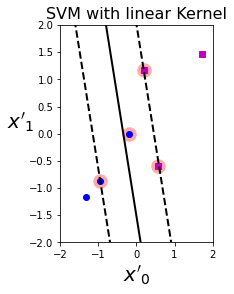

In [39]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

## Preprocessing the train and test dataset w/ standard scaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

# Train the model
svc = svm.SVC(kernel ='linear', C = 1).fit(X_scaled_train, y_train)

# Plot the chart
plt.subplot(122)
plt.plot(X_scaled_train[:, 0][y_train==1], X_scaled_train[:, 1][y_train==1], "bo")
plt.plot(X_scaled_train[:, 0][y_train==0], X_scaled_train[:, 1][y_train==0], "ms")
plot_svc_decision_boundary(svc, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("SVM with linear Kernel", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Print some information about the model
print(f'Number of Support Vectors: {svc.n_support_}')
print(f'Support Vectors Index: {svc.support_}')
print(f'Support Vectors: \n{svc.support_vectors_}')



## Seventh Question